In [1]:
import numpy as np
from bnb.problem import OptimizationProblem
from matplotlib import pyplot as plt
import matplotlib
from scipy.optimize import minimize
import pandas as pd
import warnings
import seaborn as sns
from bnb.fml_solver import FMLSolver
sns.set()
matplotlib.rcParams.update({'font.size': 11, 'font.family': 'serif'})

In [2]:
class GradientDescent(OptimizationProblem):
    
    def objective_function(self, p):
        return 1 / len(p) * np.sum([
            segment.w * np.sum(p * segment.purchase_probabilities(p))
            for segment in self.segments
        ])

a = np.asarray([
    [ 6.5,  7],
    [-4.5, -4]
])

b = np.asarray([0.02, 0.01])
w_ = 0.002
w = np.asarray([w_, 1 - w_])
problem = GradientDescent(a, b, w)
trajectories = []
np.random.seed(5)

for i in range(10):
    
    def store_trajectory(p_):
        trajectory.append(np.copy(p_))
    
    p_start = np.random.uniform(problem.p_lb, problem.p_ub)
    trajectory = [p_start]
    sol = minimize(lambda p: - problem.objective_function(p), p_start, callback=store_trajectory)
    trajectories.append(trajectory)
        

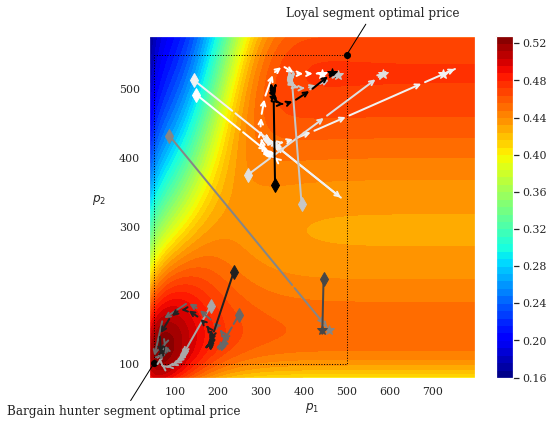

In [3]:
import matplotlib.cm as cm
import matplotlib.patches as patches


colors = cm.Greys(np.linspace(0.0, 1.0, len(trajectories)))

fig, ax = plt.subplots(figsize=(8, 6))

linspace = np.linspace(problem.p_lb * 0.8, problem.p_ub * np.asarray([1.6, 1.05]), 150)
p0, p1 = linspace[:, 0], linspace[:, 1]
P0, P1 = np.meshgrid(p0, p1)
Z = np.zeros(P0.shape)

for i in range(len(p0)):
    for j in range(len(p1)):
        p = np.asarray([P0[i, j], P1[i, j]])
        Z[i, j] = problem.objective_function(p)

cs = ax.contourf(P0, P1, Z, levels=50, cmap=plt.cm.jet, origin="lower")
# cs2 = ax.contour(cs, levels=cs.levels[::2], colors='r', origin="lower")
# ax.contour(P0, P1, Z, levels=50, color="grey")

for t, trajectory in enumerate(trajectories):

    for i in range(1, len(trajectory)):
    
        if i == 1:
            plt.plot(*trajectory[0], marker="d", markersize=10, color=colors[t])  #, fillstyle="none")
            
        if i == len(trajectory) - 1:
            plt.plot(*trajectory[-1], marker="*", markersize=10, color=colors[t])  #, fillstyle="none")
            
        
        arrowstyle = '<-' if 1 < i < len(trajectory) - 1 else '-'
        ax.annotate(
            "",
            xy=trajectory[i - 1],
            xytext=trajectory[i],
            arrowprops={
                'arrowstyle': arrowstyle, 'lw': 2, 'color': colors[t]
            },
            va='center', ha='center'
        )

ax.plot(*problem.segments[0].p_opt, marker="o", color="black")
ax.annotate(
    "Loyal segment optimal price",
    problem.segments[0].p_opt,
    problem.segments[0].p_opt + 60,
    va='center', ha='center', size=12,
                arrowprops={
                'arrowstyle': '-', 'lw': 1, 'color': "black"
            },
)

ax.plot(*problem.segments[1].p_opt, marker="o", color="black")
ax.annotate(
    "Bargain hunter segment optimal price",
    problem.segments[1].p_opt,
    problem.segments[1].p_opt - np.asarray([70, 70]),
    va='center', ha='center', size=12,
                arrowprops={
                'arrowstyle': '-', 'lw': 1, 'color': "black"
            },
)
# , problem.segments[1].p_opt

rect = patches.Rectangle(
    problem.p_lb, *(problem.p_ub - problem.p_lb),
    linewidth=1,edgecolor='black', facecolor='none', linestyle=":")



cbar = fig.colorbar(cs)
# Add the patch to the Axes
ax.add_patch(rect)

ax.set_xlabel(r"$p_1$", size=12)
ax.set_ylabel(r"$p_2$", size=12, rotation=0, labelpad=20)
plt.tight_layout()
plt.savefig("../figs/wrong_convergence.pdf")
plt.show()